In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import math

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
plt.style.use('fivethirtyeight')


In [95]:
#load data
data = pd.read_csv('AAPL.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


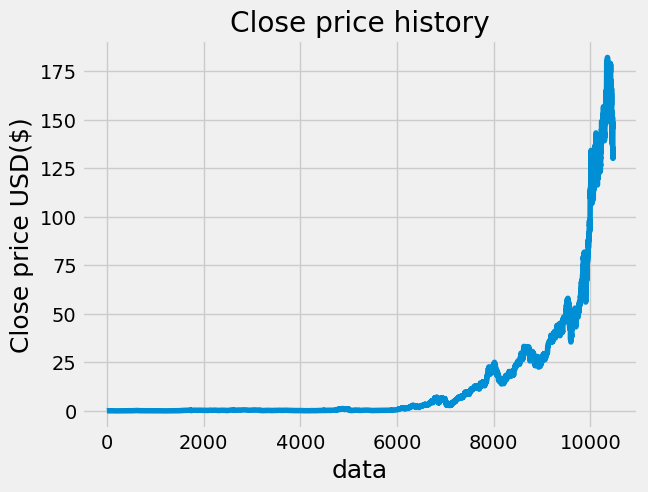

In [96]:
plt.Figure(figsize=(16,18))
plt.title('Close price history')
plt.plot(data['Close'])
plt.xlabel('data',fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.show()

In [97]:
data=data.filter(['Close'])
dataset =data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

8375

In [98]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [99]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214])]
[0.0002606768988729051]

[array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.

In [100]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [101]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(8315, 60, 1)

In [102]:
# build data
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
260/260 [==============================] - 27s 60ms/step - loss: 1.5207e-05
Epoch 2/25
260/260 [==============================] - 15s 58ms/step - loss: 2.9804e-06
Epoch 3/25
260/260 [==============================] - 15s 57ms/step - loss: 2.5287e-06
Epoch 4/25
260/260 [==============================] - 15s 59ms/step - loss: 2.8114e-06
Epoch 5/25
260/260 [==============================] - 15s 57ms/step - loss: 2.4728e-06
Epoch 6/25
260/260 [==============================] - 15s 58ms/step - loss: 3.2426e-06
Epoch 7/25
260/260 [==============================] - 15s 58ms/step - loss: 2.3257e-06
Epoch 8/25
260/260 [==============================] - 15s 58ms/step - loss: 2.0043e-06
Epoch 9/25
260/260 [==============================] - 16s 60ms/step - loss: 1.8725e-06
Epoch 10/25
260/260 [==============================] - 15s 57ms/step - loss: 1.5280e-06
Epoch 11/25
260/260 [==============================] - 15s 57ms/step - loss: 1.8204e-06
Epoch 12/25
260/260 [====================

In [103]:
# create the testing data set 
test_data=scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [104]:
#converting the data into numpy array
x_test=np.array(x_test)

In [105]:
#reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [106]:
# geting that  the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

66/66 [==============================] - 3s 26ms/step


In [107]:
#RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

1.0665501988462982

C:\Users\pc\AppData\Local\Temp\ipykernel_27944\558470289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


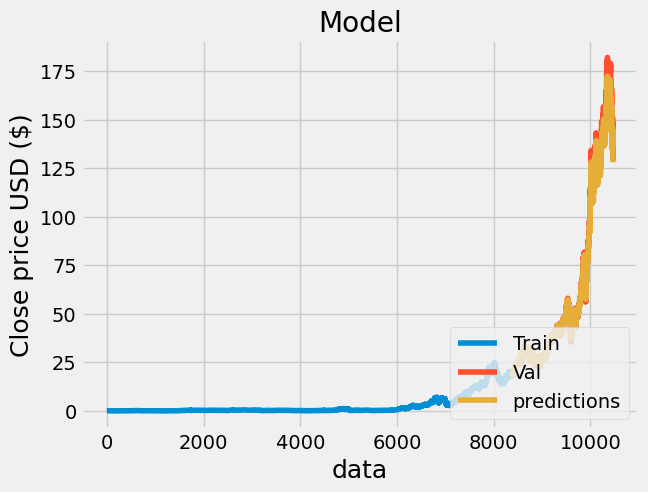

In [108]:
#plot the data
train =data[:training_data_len]
valid =data[training_data_len:]
valid['predictions']=predictions
#visualize the data
plt.Figure(figsize=(23,8))
plt.title('Model')
plt.xlabel('data',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()